In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
path = "/content/gdrive/MyDrive/ML/Praktikum/Praktikum3"

## **TUGAS PRAKTIKUM MANDIRI**

In [3]:
day = pd.read_csv(path + '/data/day.csv')

print("Data Awal:")
day.head()

Data Awal:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [5]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
# Hitung Matriks Korelasi (hanya untuk kolom numerik)
corr_matriks_day = day.select_dtypes(include=['number']).corr()

corr_matriks_day

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


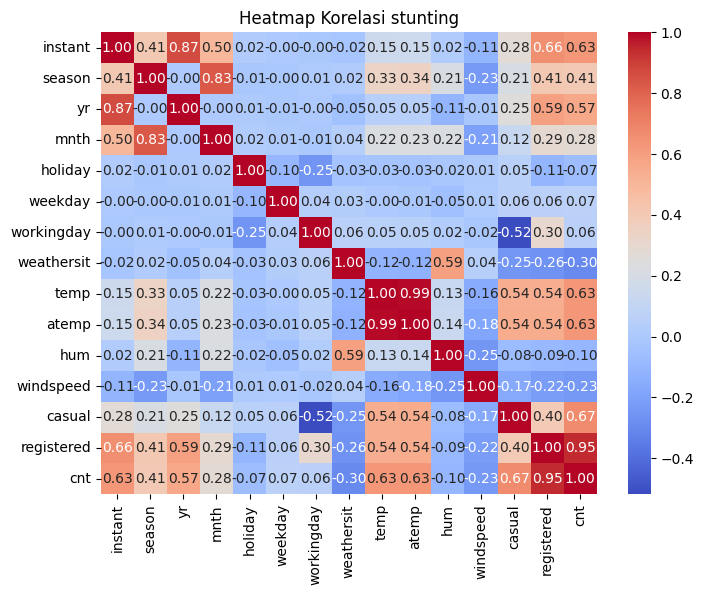

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matriks_day, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi stunting")
plt.show()

In [13]:
# Variabel dependen (target)
y = day["cnt"]

# Variabel independen (fitur prediktor)
X = day[['temp', 'hum']]

# Bagi data 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 # random_state supaya hasil konsisten
    )

## Cetak Pembagian Data
print("Jumlah data train:", len(X_train))
print("Jumlah data test", len (X_test))
## cek apakah sudah ada constanta pada data training
X_train.head()

Jumlah data train: 584
Jumlah data test 147


,temp,hum
682,0.343333,0.662917
250,0.633913,0.939565
336,0.299167,0.612917
260,0.507500,0.695000
543,0.697500,0.360000


In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
X_train_const = sm.add_constant(X_train)
X_train_const.head()

,const,temp,hum
682,1.0,0.343333,0.662917
250,1.0,0.633913,0.939565
336,1.0,0.299167,0.612917
260,1.0,0.507500,0.695000
543,1.0,0.697500,0.360000


In [17]:
# Buat model OLS
model = sm.OLS(y_train, X_train_const).fit()
print('-------------------------')
print(model.params)
print('-------------------------')
const = model.params['const']
x1_temp = model.params['temp']
x2_hum = model.params['hum']
#print persamaan regresi
print(f"y = {const:.3f} + {x1_temp:.3f}*x1 + {x2_hum:.3f}*x2")

-------------------------
const    2717.032040
temp     6822.978338
hum     -2485.358230
dtype: float64
-------------------------
y = 2717.032 + 6822.978*x1 + -2485.358*x2


In [18]:
# Tambahkan konstanta (intercept) untuk model regresi linear
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

## Tampilkan model
model = sm.OLS(y_train, X_train_const).fit()

# Tampilkan ringkasan hasil model
print("\n=== RINGKASAN MODEL REGRESI LINEAR ===")
print(model.summary())


=== RINGKASAN MODEL REGRESI LINEAR ===
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     211.7
Date:                Sun, 12 Oct 2025   Prob (F-statistic):           8.66e-70
Time:                        03:36:51   Log-Likelihood:                -5082.3
No. Observations:                 584   AIC:                         1.017e+04
Df Residuals:                     581   BIC:                         1.018e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [20]:
#Tambahkan konstanta ke data uji
X_test_const = sm.add_constant(X_test)
#Prediksi cnt
y_pred_test = model.predict(X_test_const)
#Buat tabel hasil prediksi
hasil_day = pd.DataFrame({
    "Temp": X_test["temp"].to_numpy(),
    "Hum": X_test ["hum"].to_numpy(),
    "CNT Aktual": y_test.to_numpy(),
    "CNT Prediksi": y_pred_test
})
#1) Selisih error (positif overpredict)
hasil_day["Selisih error"] = hasil_day ["CNT Prediksi"] - hasil_day ["CNT Aktual"]

#2) Akurasi per-baris (100 (1/error//aktual)), dibatasi 0-100
denom = hasil_day ["CNT Aktual"].replace(0, np.nan) # antisipasi pembagi nol
hasil_day ["Akurasi (%)"] = (1 - (hasil_day ["Selisih error"].abs() / denom)).clip(lower=0, upper=1) * 100
hasil_day

,Temp,Hum,CNT Aktual,CNT Prediksi,Selisih error,Akurasi (%)
703,0.475833,0.733750,6606,4139.998690,-2466.001310,62.670280
33,0.186957,0.437826,1550,2904.481148,1354.481148,12.614119
300,0.330833,0.585833,3747,3518.293564,-228.706436,93.896279
456,0.425833,0.676250,6041,3941.757871,-2099.242129,65.250089
633,0.550000,0.570000,7538,5053.015934,-2484.984066,67.033907
...,...,...,...,...,...,...
70,0.329167,0.594583,2132,3485.179598,1353.179598,36.530038
192,0.794167,0.559167,4258,6745.885972,2487.885972,41.571490
328,0.375000,0.643750,2792,3675.699556,883.699556,68.348870
165,0.626667,0.471667,5180,5820.505945,640.505945,87.635020
